
# bar(x, height)

See `~matplotlib.axes.Axes.bar`.


In [58]:
import pandas as pd

###############################
# bar图的数据 原数据为cycle数
###############################

# Need to configure by hands
file_name="alexnet_compose.csv"
map_params=["Layer"]
base_line="CPU" # 剩下的为player
# plareys_params=["Hwacha","PolymorPIC"]


players_list_bar=[]
players_list=[]
maps_list=[]
players_cycle_scores_bar={}
players_speed_up_scores_bar={}
players_tops_area_scores_line={}


#### load Data >>>>>>>>>
dataframe = pd.read_csv(file_name)
dataframe.set_index(map_params, inplace=True)
print(dataframe)


base_line_scores= dataframe[base_line].tolist()
for e in dataframe.columns:
    if e==base_line:
        continue
    players_list_bar.append(e)
players_list=players_list_bar
    
for player in players_list_bar:
    players_cycle_scores_bar[player]=[]
    players_speed_up_scores_bar[player]=[]
    players_tops_area_scores_line[player]=[]
    

# original data:cycle
for index,row in dataframe.iterrows():
    # matrix_size=str(index[0])+"$\\times$"+str(index[1])+"$\\times$"+str(index[2])
    layer_name=str(index)
    maps_list.append(layer_name)
    for player_name in players_list_bar:
        players_cycle_scores_bar[player_name].append(int(row[player_name]))

# print(players_cycle_scores_bar)
# speed up
for player in players_list_bar:
    cpu_cycle_list=base_line_scores
    player_cycle_list=players_cycle_scores_bar[player]
    for score1, score2 in zip(cpu_cycle_list, player_cycle_list):
        players_speed_up_scores_bar[player].append(score1/score2)

players_speed_up_scores_bar

                    CPU  PolymorPIC_8bit  PolymorPIC_MixPrecision
Layer                                                            
conv1-2    5.728788e+09         76273572                 71721389
conv3-4    1.921904e+10        210220786                188097581
conv5-6    3.775386e+09         44463503                 40436654
conv7-8    4.052495e+09         41829071                 36808066
conv9-10   4.810247e+09         52392608                 46735904
conv11-12  4.929301e+09         42139253                 36811046
con13-14   2.747095e+09         24818784                 21509321
conv15-16  3.527403e+09         31090972                 27045666
conv17-18  3.236435e+09         26437675                 23143977
conv19-20  2.746824e+09         24582149                 21275207
conv21-22  3.527417e+09         31085633                 27044013
conv23-24  4.111013e+09         26811172                 22233332
conv25-26  3.709776e+09         23954881                 19478663
conv27-28 

{'PolymorPIC_8bit': [75.10842654648454,
  91.42313719633795,
  84.90976583648842,
  96.88225743765622,
  91.81155788236386,
  116.97647972070126,
  110.68612241437775,
  113.45423761598704,
  122.41755021952574,
  111.74060941539327,
  113.47419574824164,
  153.3320791422322,
  154.8651269860201,
  157.80974312540414,
  157.67813835751704,
  151.1157468971155,
  157.86346596418034,
  157.62452199140756,
  151.14036329912315,
  157.90489638459735,
  244.72518172527163,
  213.39494508360187,
  237.44701910400215,
  222.37256102372524,
  99.18036928236488],
 'PolymorPIC_MixPrecision': [79.87558606819508,
  102.17592197530706,
  93.36543097754824,
  110.09801017526974,
  102.9240166617939,
  133.9082153221074,
  127.7164892373869,
  130.42394759293413,
  139.8392077126589,
  129.10916965461251,
  130.4324622237092,
  184.90313314261667,
  190.45330205671715,
  195.84247976969883,
  194.63001885048175,
  186.2919463491839,
  195.96263581855655,
  194.6454236161356,
  186.32773091920686,
  1

In [59]:
# ###############################
# # line图的数据
# ###############################

# # Need to configure by hands
# hwacha_area=0.97584732
# polymorpic_area=0.37584732
# frequency=200000000
# area_dict={"Hwacha":hwacha_area,"PolymorPIC":polymorpic_area}

# for index,row in dataframe.iterrows():
#     M=index[0]
#     N=index[1]
#     K=index[2]
#     total_operations=M*K*(2*N-1)
#     one_T=1000000000000
#     total_operations_one_T=total_operations/one_T
    

#     for player_name in players_list_bar:
#         cycle_time=row[player_name]
#         exe_time_ms=1000*cycle_time/frequency
#         players_tops_area_scores_line[player_name].append(total_operations_one_T/exe_time_ms/area_dict[player_name]/1000)
# #### <<<<<<<< load Data 

[[0.2784313725490196, 0.28627450980392155, 0.3803921568627451], [0.12941176470588237, 0.10196078431372549, 0.24313725490196078], [0.6470588235294118, 0.592156862745098, 0.7137254901960784], [0.996078431372549, 0.9529411764705882, 0.9098039215686274], [0.8156862745098039, 0.4235294117647059, 0.615686274509804], [0.06666666666666667, 0.07058823529411765, 0.06274509803921569], [0.3607843137254902, 0.34509803921568627, 0.3333333333333333], [1.0, 1.0, 1.0], [0.8313725490196079, 0.8313725490196079, 0.8313725490196079], [0.5294117647058824, 0.5294117647058824, 0.5294117647058824]]
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


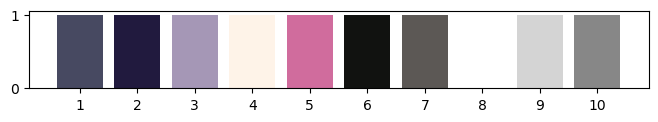

Please choose color for the following players:
['PolymorPIC_8bit', 'PolymorPIC_MixPrecision']


In [60]:
# Show color options
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# (33,26,62),(69,51,112),(165,151,182),(254,243,232),(208,108,157)
colors_option = {"1":[71, 73, 97], 
                 "2":[33,26,62], 
                 "3":[165,151,182], 
                 "4":[254,243,232], 
                 "5":[208,108,157],
                 "6":[17,18,16],
                 "7":[92,88,85],
                 "8":[255,255,255],
                 "9":[212,212,212],
                 "10":[135,135,135]}
# normalize
colors_list=[]
colors_id=[]
for key in colors_option:
    color_RGB=colors_option[key]
    for i in range(len(color_RGB)):
        color_RGB[i]/=255
    colors_list.append(color_RGB)
    colors_option[key]=color_RGB
    colors_id.append(key)
    
print(colors_list)
print(colors_id)

fig, ax = plt.subplots(figsize=(8, 1))
data = [1 for i in range(len(colors_option))]
ax.bar(range(len(data)), data, color=colors_list, tick_label=colors_id)
plt.show()

print("Please choose color for the following players:")
print(players_list)

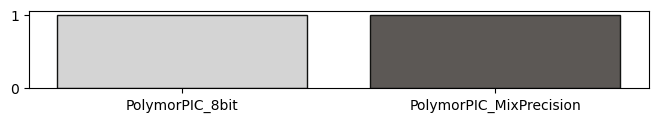

In [61]:
# choose color
# 根据从左到右的顺序设置颜色
choosed_colors_id=[9,7]
choosed_colors=[colors_option[str(i)] for i in choosed_colors_id]
edgecolor_id=[6,6]
choosed_edgecolor=[colors_option[str(i)] for i in edgecolor_id]
rotation_=[60,50]

fig, ax = plt.subplots(figsize=(8, 1))
data = [1 for i in range(len(players_list_bar))]
ax.bar(range(len(data)), data, color=choosed_colors, edgecolor=choosed_edgecolor, tick_label=players_list_bar)
plt.show()

# Generate choose dict
choosed_colors_dict = {player: color for player, color in zip(players_list_bar, choosed_colors)}
choosed_edgecolor_dict = {player: color for player, color in zip(players_list_bar, choosed_edgecolor)}
choosed_rotation_dict = {player: color for player, color in zip(players_list_bar, rotation_)}


25


/var/folders/mn/d07bd1893b7bp19drk69nlk00000gn/T/ipykernel_72710/3880589254.py:59: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax_bar.set_ylim([0, y_max+100])


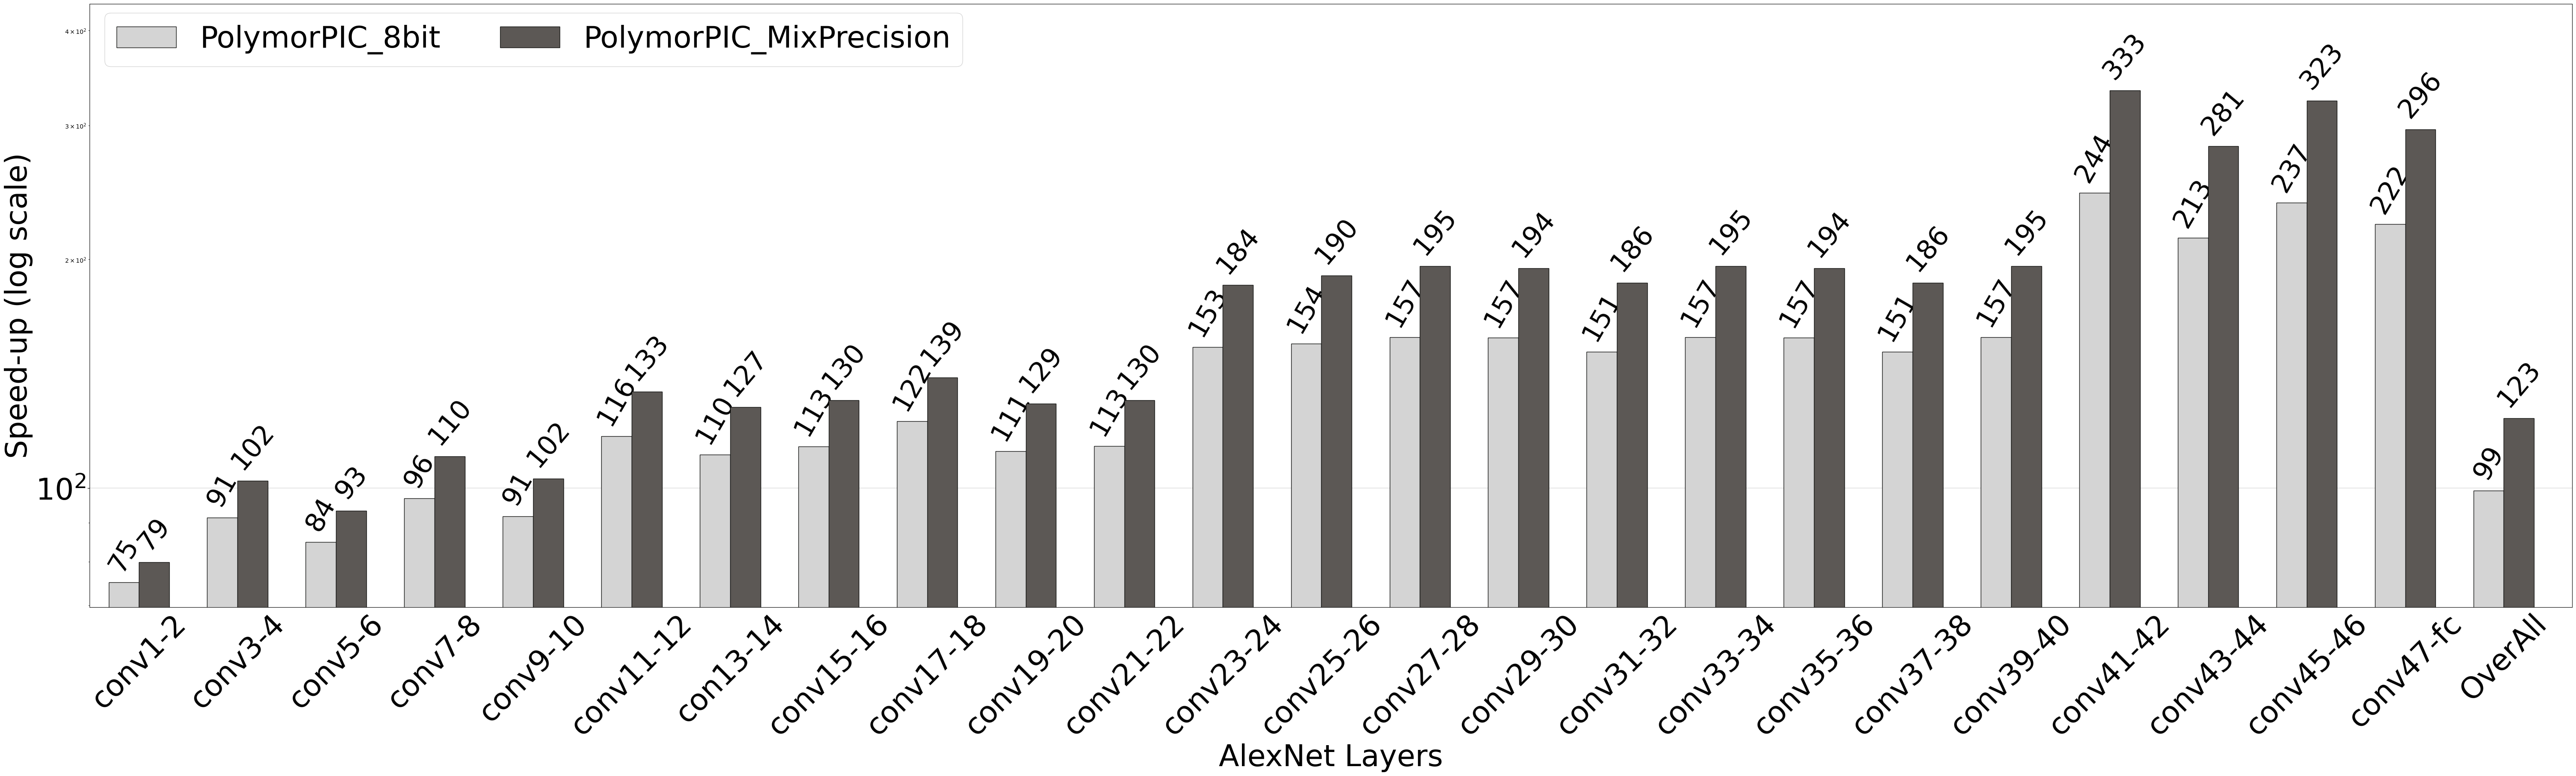

In [62]:
# data from https://allisonhorst.github.io/palmerpenguins/
import matplotlib.pyplot as plt
import numpy as np

# 图表大小
fig_size=(60,18)

####################
# bar图部分
####################
# 每个bar的宽度
bar_width=0.8
# 比较对象的数量
players_num = len(players_list_bar)
map_num = len(maps_list)
print(map_num)
# 每个map的定位，第0个map，第1个map。。用于在x轴上进行放置
map_index=np.arange(map_num)
# 第0个map的初始位置
map_init_pos=0.5
# 每个map的大小（长度，空间）
map_size=2.6
# 根据上面的参数计算每个map的初始位置
each_map_pos=map_index*map_size+map_init_pos
# 计算所有player（每组bar）的中间位置，用于放置map的名字
map_label_pos=each_map_pos+players_num*bar_width/2
map_label_pos

if bar_width*players_num>=map_size:
    message="Warning: one map can't fit so many players! Reduce the width of bars or increase the map size!"
    # ANSI 转义序列设置颜色为红色
    red_start = "\033[91m"
    red_end = "\033[0m"
    print(red_start + message + red_end)
    print(red_start + message + red_end)


# 根据上面参数计算每个map第一个player的位置，即map_pos加上bar宽度的一半
first_player_pos=each_map_pos+bar_width/2

fig, ax_bar = plt.subplots(figsize=fig_size,layout='constrained')
# 每次画一个player在的每个map的score

# 每次画一个player在map中的bar
for_bar_setting={}
y_max=0
for i in range(len(players_list_bar)):
    player = players_list_bar[i]
    player_scores= players_speed_up_scores_bar[player]
    player_pos=first_player_pos+i*bar_width
    y_max=max(y_max,max(player_scores))
    player_bar = ax_bar.bar(player_pos, player_scores, bar_width, label=player, edgecolor=choosed_edgecolor_dict[player] ,color=choosed_colors_dict[player],zorder=10)
    for_bar_setting[player]=player_bar

# y轴信息
ax_bar.set_ylabel('Speed-up (log scale)',fontsize=50)   # 标签字体
ax_bar.set_yscale('log')                        # 尺度
ax_bar.tick_params(axis='y', labelsize=50)      # tick字体大小
ax_bar.set_ylim([0, y_max+100])
ax_bar.tick_params(axis='y', labelsize=50)  

# x轴信息
ax_bar.set_xticks(map_label_pos)                                    # 标签位置
ax_bar.set_xticklabels(maps_list, rotation=45,fontsize=50)          # 标签的信息，字体大小，内容
# ax_bar.set_xlabel('Matrix Sizes ($M\\times K\\times N$)',fontsize=50)       # label
ax_bar.set_xlabel('AlexNet Layers',fontsize=50)       # label
ax_bar.tick_params(axis='x', length=0)                      # 对应标签上从x轴延伸出的小短线去除
ax_bar.set_xlim([0, max(each_map_pos+players_num*bar_width+1)])                                  # x的范围，从0开始

# 图表边框线设置
ax_bar.spines['top'].set_visible(True)
ax_bar.spines['right'].set_visible(True)

# 网格线
ax_bar.yaxis.grid(True, color='gray', linestyle='-', linewidth=0.3, zorder=0)

# 设置每个bar上的标签
# bar_label_interval=[0.1,1,1]
bar_label_interval= 0.02
# bar_label_interval_dict = {player: interval for player, interval in zip(players_list, bar_label_interval)}
for player in for_bar_setting:
    player_bars=for_bar_setting[player]
    # 设置每单个bar5
    for bar in player_bars:
        height=bar.get_height()+bar_label_interval*bar.get_height() # 在那个高度防
        ax_bar.text(bar.get_x() + bar.get_width() / 2, height, 
                f'{int(bar.get_height())}', ha='center', va='bottom', 
                fontsize=45, rotation=choosed_rotation_dict[player])  # 设置字体大小为10，旋转45度


# ax.set_title('Penguin attributes by species')
# ax.legend(loc='upper left', ncols=3)
ax_bar.legend(loc='upper left',bbox_to_anchor=(0,1.01),fontsize=50,ncol=2)
# ax.set_ylim(0, 250)
# red_patch = mpatches.Patch(color='red', label='The red data')

plt.savefig("/Users/skytbac/Downloads/5_alexnet_layers.pdf")
plt.show()